In [21]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [22]:
# Importing Dataset
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names).values
targets = boston.target

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.25, random_state = 0)

In [4]:
##feture scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [13]:
#Training the Algorithm

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [14]:
#predicting the data

y_predict = regressor.predict(X_test)  

In [7]:
#Evaluating the Algorithm
#For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. 
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))


Mean Absolute Error: 2.6105511811
Mean Squared Error: 19.7587070866
Root Mean Squared Error: 4.44507672449


In [27]:
#check the score for the above model

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.75815244552608774

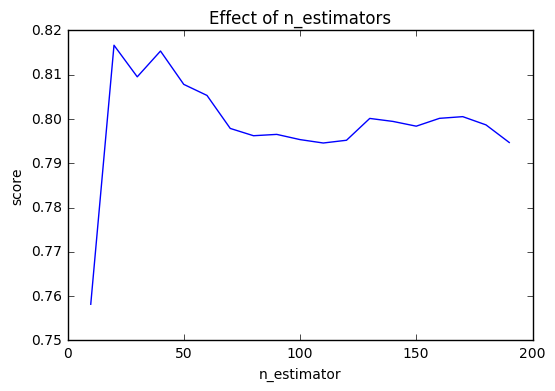

In [10]:
#changing the estimator to know at what point we get to the good RMSE
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    regressor.set_params(n_estimators=n)
    regressor.fit(X_train, y_train)
    scores.append(regressor.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [11]:
scores

[0.75815244552608774,
 0.81663925757652545,
 0.80950930233059737,
 0.81532828321059969,
 0.80780542373300157,
 0.80530546559990568,
 0.79785454061245065,
 0.79620771654181799,
 0.79650990217696338,
 0.79533321076664165,
 0.79456383024846433,
 0.79518460691881532,
 0.8001146788051603,
 0.79943556994800236,
 0.79836368199059915,
 0.80013414678873551,
 0.80051557265348416,
 0.79865431376869456,
 0.79467725700423919]

In [29]:
##Feature Importance
print(regressor.feature_importances_)

[ 0.03519966  0.00108842  0.00668771  0.00051295  0.01721654  0.35327289
  0.0147695   0.03584518  0.00588362  0.02307292  0.01882518  0.00755524
  0.4800702 ]


In [31]:
## as per the above analysis at the Estimator =20, we can predict the price of the house clearly

regressor = RandomForestRegressor(n_estimators = 20,random_state=0)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)  

In [32]:
#Evaluating the Algorithm
#For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. 
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 2.48937007874
Mean Squared Error: 14.980392126
Root Mean Squared Error: 3.87045115277
